In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Exploratory Data Analysis

In [3]:
# Load the train, test and store csv as dataframes
train_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/test.csv')
store_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/store.csv')

<ipython-input-3-b00ccb8bba85>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/train.csv')


NOTE: Warning in 7th colomn(StateHoliday)

In [4]:
print('Train Dataframe Information')
print(train_df.info())
print('Test Dataframe Information')
print(test_df.info())
print('Store Dataframe Information')
print(store_df.info())

Train Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
Test Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64 

NOTE:

inconsistent non-null values and Date colomns have different Dtype(not Date format)

All three dataframes have Store as common(Key feature useful in merging for later)

# Description for Data Distribution Insights

In [5]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [7]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [8]:
# This is a good practice lu
print(train_df.shape)
print(test_df.shape)
print(store_df.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [9]:
# Check sum of null values in each colomns
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(store_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


NOTE: There exists null values in some colomns in store dataframe and Open colomn in test dataframe

In [10]:
print('Unique Values in training Dataframe')
unique_counts = train_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in testing Dataframe')
unique_counts = test_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in store Dataframe')
unique_counts = store_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)

Unique Values in training Dataframe
          Column  Unique Values
0          Store           1115
1      DayOfWeek              7
2           Date            942
3          Sales          21734
4      Customers           4086
5           Open              2
6          Promo              2
7   StateHoliday              5
8  SchoolHoliday              2
Unique Values in testing Dataframe
          Column  Unique Values
0             Id          41088
1          Store            856
2      DayOfWeek              7
3           Date             48
4           Open              2
5          Promo              2
6   StateHoliday              2
7  SchoolHoliday              2
Unique Values in store Dataframe
                      Column  Unique Values
0                      Store           1115
1                  StoreType              4
2                 Assortment              3
3        CompetitionDistance            654
4  CompetitionOpenSinceMonth             12
5   CompetitionOpenSince

NOTE: StateHoliday in test dataframe only uses 2 unique values out of the 5 values present in train daraframe

# Data Preprocess

In [11]:
# Checking for mixed types since a warning came when loading to dataframe in train dataset
print(train_df['StateHoliday'].value_counts())

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [12]:
# Checking for mixed types since a warning came when loading to dataframe in train dataset
print(test_df['StateHoliday'].value_counts())

StateHoliday
0    40908
a      180
Name: count, dtype: int64


Two '0' are shown because its mixed(string and integer '0'), must convert into string 0s to ensure object dtype is respected

In [13]:
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

In [14]:
# Verify the changes
print(train_df['StateHoliday'].value_counts())

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [15]:
# Ensure Date column is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [16]:
# Check for null entries in Open colomn
null_count = test_df['Open'].isnull().sum()
print(f"Null values in 'Open': {null_count}")

Null values in 'Open': 11


In [17]:
# Replace 'null' with '0'
test_df['Open'] = test_df['Open'].fillna(0).astype(int)
print(f"Null values in 'Open': {test_df['Open'].isnull().sum()}")

Null values in 'Open': 0


 There consists multiple colomns with null entries(MUST be treated)

In [18]:
# Fill missing CompetitionDistance with the maximum (assumes no nearby competition)
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].max()).astype(float)
# Fill missing date-related features with 0 (likely means no competition/promo data)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0).astype(float)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0).astype(float)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0).astype(float)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0).astype(float)
# Fill missing PromoInterval (object/string type) with a placeholder string
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('None').astype(object)

In [19]:
# Verify changes
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5594.466368,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,8479.266802,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6905.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Visualize Sales

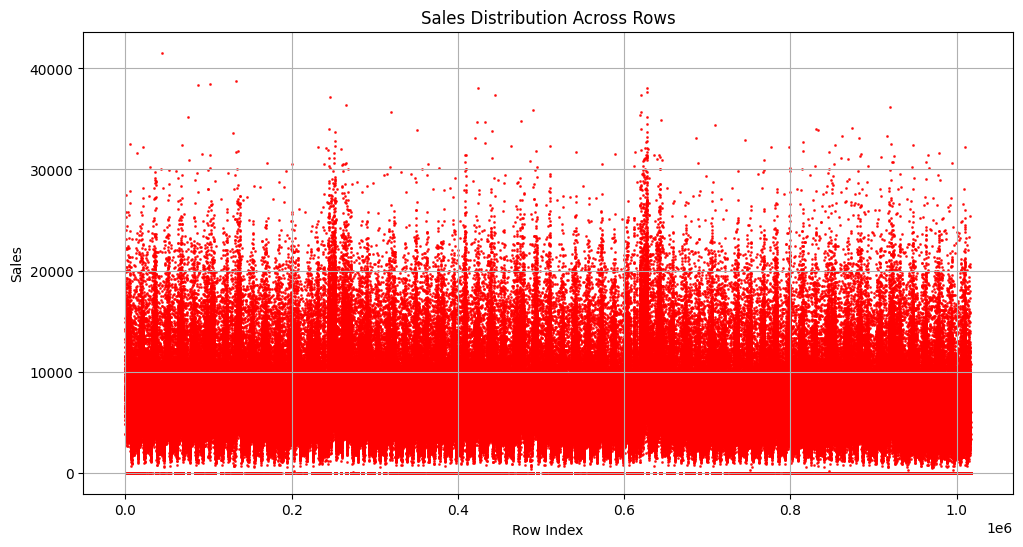

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(train_df.index, train_df['Sales'], s=1, color='red', alpha=0.8)
plt.title('Sales Distribution Across Rows')
plt.xlabel('Row Index')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

The Visuals show how sales never contain negative values and show some mild positive skew

However we still need to check for outliers

There consist no negative values for Sales distribution so upper bound outliers are only considered

In [21]:
# Find Skewness
sales = train_df['Sales']
pearson_skewness = 3 * (sales.mean() - sales.median()) / sales.std()

print(f"Pearson Skewness of Sales: {pearson_skewness:.4f}")

Pearson Skewness of Sales: 0.0232


In [22]:
threshold = 4
# Calculate Inter-Quartile Range(IQR)
Q1 = train_df['Sales'].quantile(0.25)
Q3 = train_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound (adjust threshold based on severity)
upper_bound = Q3 + 1.5 * IQR*threshold
train_df['Sales'] = train_df['Sales'].clip(upper=upper_bound)

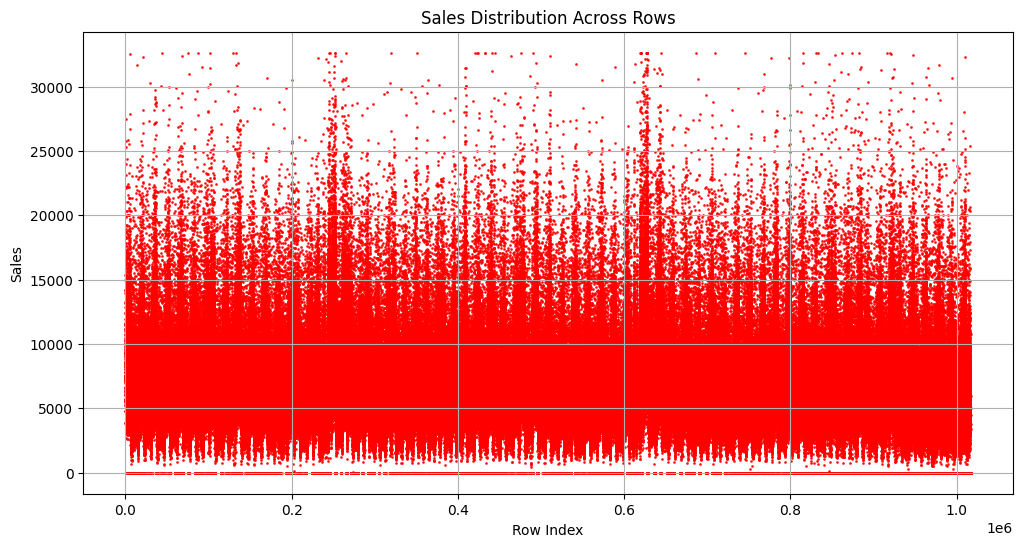

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(train_df.index, train_df['Sales'], s=1, color='red', alpha=0.8)
plt.title('Sales Distribution Across Rows')
plt.xlabel('Row Index')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

IMPORTANT: Merge store colomns with train and test dataframes

In [24]:
# Merge store details with train set
train_merged = pd.merge(train_df, store_df, on='Store', how='left')
# Merge store details with test set
test_merged = pd.merge(test_df, store_df, on='Store', how='left')

#### Pearson Correlation Matrix for numeric colomns(to find linear relationships)

In [25]:
# Select numeric columns only
numeric_cols = train_merged.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_cols.corr(method='pearson')

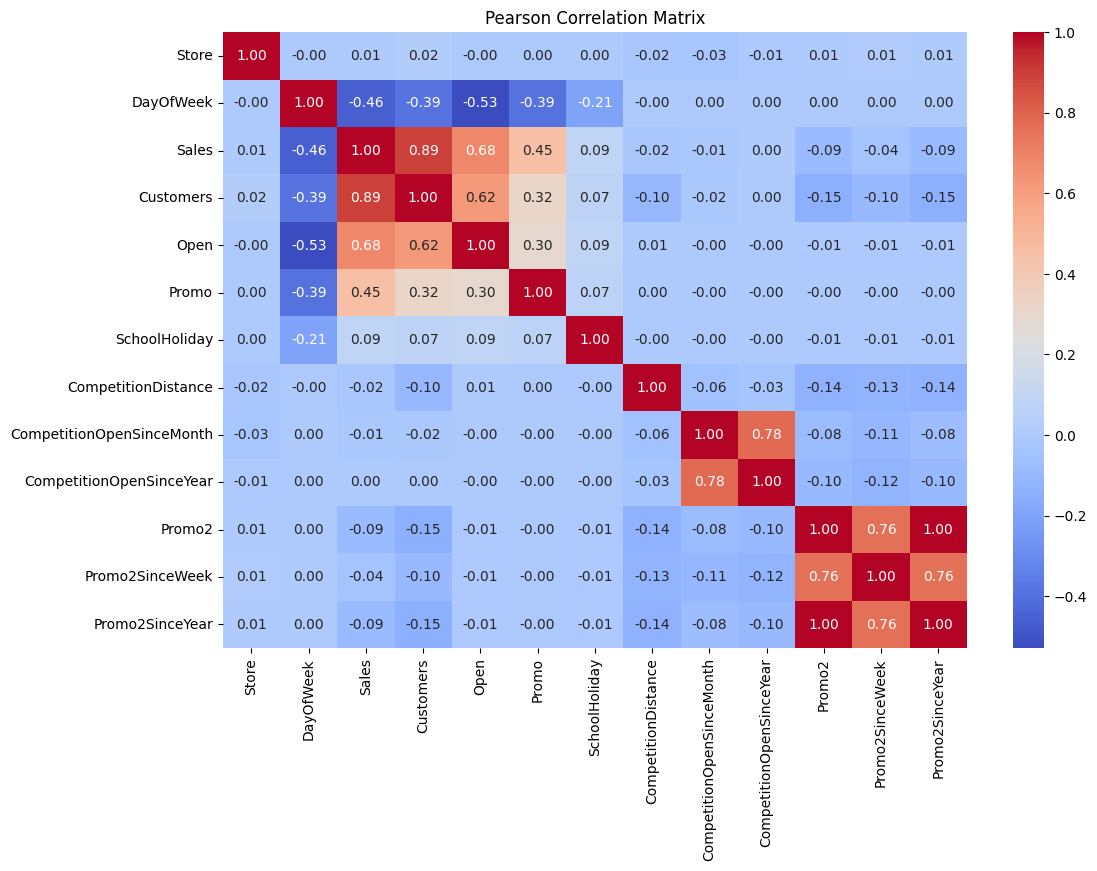

In [26]:
# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

EVALUATION OF LINEARITY:

DayOfWeek has negative relationship with Sales and Customers(Monday has highest, Sunday has lowest)

Open has strong postive relationship with Sales and Customers(obvious because when store is open sales are present)

Promo has quite strong positive relationship with Sales and Customers(promotes Sales and consumer behaviour as expected)

SchoolHoliday has a mild positive relationship with Sales and Customers(Maybe more family engagement)

CompetitionOpenSinceMonth and CompetitionOpenSinceYear show strong positive linerity relationship

Promo2 and Promo2SinceYear shows a perfect linear relationship

Promo2 and Promo2SinceWeek shows strong positve relationship

Promo2SinceWeek and Promo2SinceYear shows strong positive relationship

#### Group by Categorical features(Including binary features)

In [27]:
# Average sales by Promo (0 or 1)
promo_sales = train_merged.groupby('Promo')['Sales'].mean()
print("Average Sales by Promo:\n", promo_sales)
# Average sales by whether the store is open
open_sales = train_merged.groupby('Open')['Sales'].mean()
print("\nAverage Sales by Open:\n", open_sales)
# Average sales by day of the week
dayofweek_sales = train_merged.groupby('DayOfWeek')['Sales'].mean()
print("\nAverage Sales by Day of the Week:\n", dayofweek_sales)
# Average sales by SchoolHoliday
school_sales = train_merged.groupby('SchoolHoliday')['Sales'].mean()
print("\nAverage Sales by School Holiday:\n", school_sales)
# Average sales by StateHoliday
state_sales = train_merged.groupby('StateHoliday')['Sales'].mean()
print("\nAverage Sales by State Holiday:\n", state_sales)
# Average sales by StoreType
storetype_sales = train_merged.groupby('StoreType')['Sales'].mean()
print("\nAverage Sales by Store Type:\n", storetype_sales)
# Average sales by Assortment
storetype_sales = train_merged.groupby('Assortment')['Sales'].mean()
print("\nAverage Sales by Assortment:\n", storetype_sales)

Average Sales by Promo:
 Promo
0    4405.958988
1    7991.017731
Name: Sales, dtype: float64

Average Sales by Open:
 Open
0       0.00000
1    6955.38415
Name: Sales, dtype: float64

Average Sales by Day of the Week:
 DayOfWeek
1    7808.711919
2    7005.229391
3    6555.880562
4    6247.463622
5    6723.112071
6    5847.562599
7     204.051917
Name: Sales, dtype: float64

Average Sales by School Holiday:
 SchoolHoliday
0    5620.872144
1    6476.408929
Name: Sales, dtype: float64

Average Sales by State Holiday:
 StateHoliday
0    5947.417750
a     289.256219
b     212.115845
c     168.733171
Name: Sales, dtype: float64

Average Sales by Store Type:
 StoreType
a     5738.127177
b    10054.815730
c     5723.629246
d     5641.764119
Name: Sales, dtype: float64

Average Sales by Assortment:
 Assortment
a    5480.889520
b    8553.931999
c    6058.599175
Name: Sales, dtype: float64


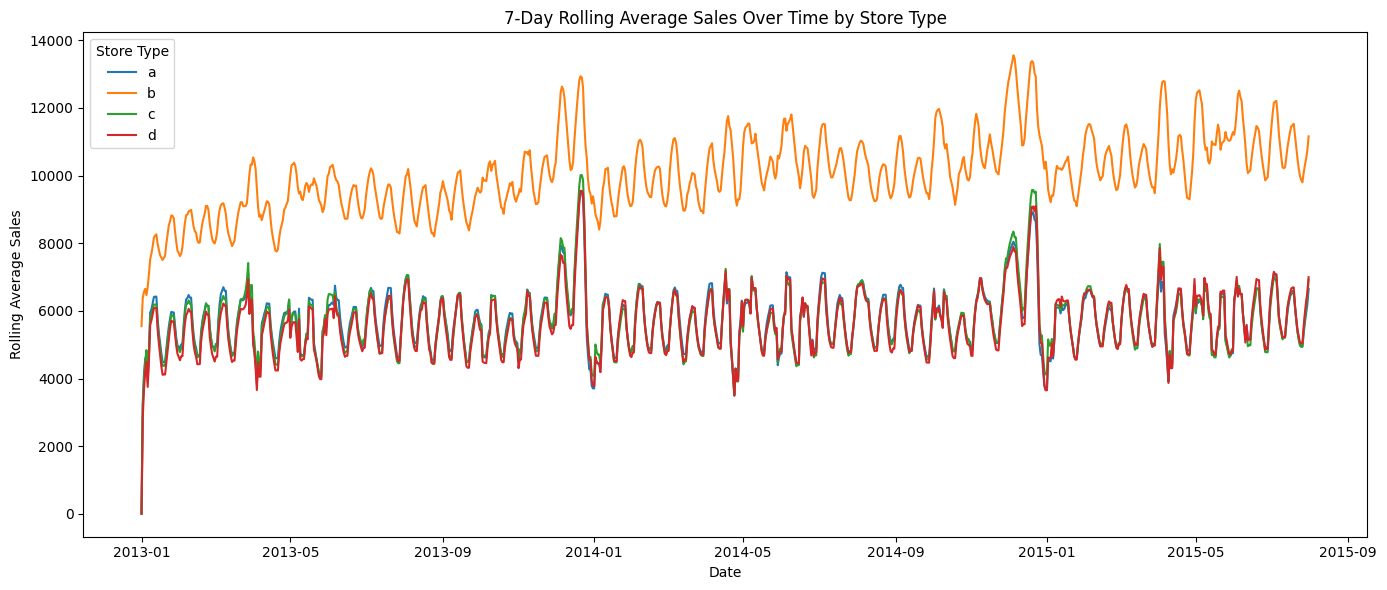

In [28]:
# Group by Date and StoreType and calculate average Sales
sales_over_time = train_merged.groupby(['Date', 'StoreType'])['Sales'].mean().reset_index()

# Compute 7-day rolling average for each StoreType
sales_over_time['SalesRolling'] = sales_over_time.groupby('StoreType')['Sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())

# Plot the smoothed sales
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time, x='Date', y='SalesRolling', hue='StoreType')
plt.title("7-Day Rolling Average Sales Over Time by Store Type")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sales")
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

NOTE: Store type B exhibit more sales compared to the other store types

In [29]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [30]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  int64         
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        41088 non-null  float64       
 11  CompetitionOpenSinceMonth  41088 non-null  float64       
 12  Comp

In [31]:
print('Unique Values in merged training Dataframe')
unique_counts = train_merged.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in merged testing Dataframe')
unique_counts = test_merged.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)

Unique Values in merged training Dataframe
                       Column  Unique Values
0                       Store           1115
1                   DayOfWeek              7
2                        Date            942
3                       Sales          21691
4                   Customers           4086
5                        Open              2
6                       Promo              2
7                StateHoliday              4
8               SchoolHoliday              2
9                   StoreType              4
10                 Assortment              3
11        CompetitionDistance            654
12  CompetitionOpenSinceMonth             13
13   CompetitionOpenSinceYear             24
14                     Promo2              2
15            Promo2SinceWeek             25
16            Promo2SinceYear              8
17              PromoInterval              4
Unique Values in merged testing Dataframe
                       Column  Unique Values
0              

In [32]:
print(train_merged['PromoInterval'].value_counts())

PromoInterval
None                508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64


### Feature engineering and Data Preparation

In [33]:
# Handle categorical variables
# StateHoliday encoding
for col in ['0', 'a', 'b', 'c']:
    train_merged[f'StateHoliday_{col}'] = (train_merged['StateHoliday'] == col).astype(int)
    test_merged[f'StateHoliday_{col}'] = (test_merged['StateHoliday'] == col).astype(int)

# StoreType encoding
for col in ['a', 'b', 'c', 'd']:
    train_merged[f'StoreType_{col}'] = (train_merged['StoreType'] == col).astype(int)
    test_merged[f'StoreType_{col}'] = (test_merged['StoreType'] == col).astype(int)

# Assortment encoding
for col in ['a', 'b', 'c']:
    train_merged[f'Assortment_{col}'] = (train_merged['Assortment'] == col).astype(int)
    test_merged[f'Assortment_{col}'] = (test_merged['Assortment'] == col).astype(int)

# PromoInterval encoding
promo_intervals = ['None', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
for interval in promo_intervals:
    train_merged[f'PromoInterval_{interval}'] = (train_merged['PromoInterval'] == interval).astype(int)
    test_merged[f'PromoInterval_{interval}'] = (test_merged['PromoInterval'] == interval).astype(int)

# Date-based features
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Year'] = train_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Year'] = test_merged['Date'].dt.year

# Competition features
train_merged['CompetitionOpen'] = 12 * (train_merged['Year'] - train_merged['CompetitionOpenSinceYear']) + \
                                (train_merged['Month'] - train_merged['CompetitionOpenSinceMonth'])
test_merged['CompetitionOpen'] = 12 * (test_merged['Year'] - test_merged['CompetitionOpenSinceYear']) + \
                               (test_merged['Month'] - test_merged['CompetitionOpenSinceMonth'])

# Fix negative values
train_merged['CompetitionOpen'] = train_merged['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)
test_merged['CompetitionOpen'] = test_merged['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)

# Promo2Active feature - checks if month is in PromoInterval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

def is_promo2_active(row):
    if row['Promo2'] == 0:
        return 0
    if row['PromoInterval'] == 'None':
        return 0

    month_abbr = month_map[row['Month']]
    return 1 if month_abbr in row['PromoInterval'] else 0

train_merged['Promo2Active'] = train_merged.apply(is_promo2_active, axis=1)
test_merged['Promo2Active'] = test_merged.apply(is_promo2_active, axis=1)

# Drop original categorical columns
cols_to_drop = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval',
               'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2SinceWeek', 'Promo2SinceYear']

# Prepare final datasets
X_train = train_merged.drop(cols_to_drop + ['Sales', 'Customers', 'Date'], axis=1)
y_sales = train_merged['Sales']
y_customers = train_merged['Customers']

X_test = test_merged.drop(cols_to_drop + ['Id', 'Date'], axis=1)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (1017209, 26)
Testing features shape: (41088, 26)


## Create Sales XGBoost Model

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# Sort by date to ensure chronological order
train_merged = train_merged.sort_values('Date')

# Define a cutoff date
cutoff_date = pd.to_datetime('2015-05-01')  # Adjustable

# Create the split
X_train_time = train_merged[train_merged['Date'] < cutoff_date].drop(cols_to_drop + ['Sales', 'Customers', 'Date'], axis=1)
y_train_time = train_merged[train_merged['Date'] < cutoff_date]['Sales']

X_val_time = train_merged[train_merged['Date'] >= cutoff_date].drop(cols_to_drop + ['Sales', 'Customers', 'Date'], axis=1)
y_val_time = train_merged[train_merged['Date'] >= cutoff_date]['Sales']

print(f"Training set: {X_train_time.shape[0]} samples from {train_merged[train_merged['Date'] < cutoff_date]['Date'].min()} to {train_merged[train_merged['Date'] < cutoff_date]['Date'].max()}")
print(f"Validation set: {X_val_time.shape[0]} samples from {train_merged[train_merged['Date'] >= cutoff_date]['Date'].min()} to {train_merged[train_merged['Date'] >= cutoff_date]['Date'].max()}")

Training set: 914629 samples from 2013-01-01 00:00:00 to 2015-04-30 00:00:00
Validation set: 102580 samples from 2015-05-01 00:00:00 to 2015-07-31 00:00:00


In [36]:
# Convert to DMatrix format for XGBoost
dtrain_time = xgb.DMatrix(X_train_time, label=y_train_time)
dval_time = xgb.DMatrix(X_val_time, label=y_val_time)
dtest = xgb.DMatrix(X_test)

In [37]:
# Set XGBoost parameters (using your best hyperparameter settings)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.083105669676771,
    'max_depth': 11,
    'min_child_weight': 2,
    'subsample': 0.692510579831738,
    'colsample_bytree': 0.6768551376695741,
    'gamma': 1.0,
    'reg_alpha': 0.5,
    'reg_lambda': 1.0,
    'tree_method': 'hist',  # For faster training in XGBoost 3.0.0
    'random_state': 42
}

# Define evaluation list
evals = [(dtrain_time, 'train'), (dval_time, 'validation')]

# Train model
model = xgb.train(
    params,
    dtrain_time,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=50
)

# Make predictions on validation set
val_preds = model.predict(dval_time)
# Store Logic(When Store is closed, Sales are zero)
val_preds_adjusted = np.where(X_val_time['Open'] == 0, 0, val_preds)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val_time, val_preds_adjusted))
mae = mean_absolute_error(y_val_time, val_preds_adjusted)
r2 = r2_score(y_val_time, val_preds_adjusted)

print(f"\nValidation Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

[0]	train-rmse:3625.32786	validation-rmse:3700.40092
[50]	train-rmse:1524.64741	validation-rmse:1660.13961
[100]	train-rmse:1103.09149	validation-rmse:1299.96706
[150]	train-rmse:923.14782	validation-rmse:1131.58682
[200]	train-rmse:850.70777	validation-rmse:1064.05665
[250]	train-rmse:808.96813	validation-rmse:1023.75201
[300]	train-rmse:782.95358	validation-rmse:1004.37589
[350]	train-rmse:766.23254	validation-rmse:992.89398
[400]	train-rmse:751.94290	validation-rmse:985.59708
[450]	train-rmse:741.35865	validation-rmse:981.05431
[500]	train-rmse:732.24377	validation-rmse:978.74930
[538]	train-rmse:727.14513	validation-rmse:978.10550

Validation Results:
RMSE: 974.53
MAE: 626.45
R²: 0.9379


In [38]:
def rmspe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Create a mask to avoid division by zero in actual values
    mask = y_true != 0
    if not np.all(mask):
        print("Warning: Some actual values are 0, those will be ignored in the RMSPE calculation.")
    percentage_errors = (y_pred[mask] - y_true[mask]) / y_true[mask]
    return np.sqrt(np.mean(percentage_errors ** 2))

# Calculate RMSPE using the predictions for the validation set
rmspe_value = rmspe(y_val_time, val_preds_adjusted)
print(f"RMSPE: {rmspe_value:.4f}")

RMSPE: 0.1520


In [39]:
# Make predictions on test set
test_preds = model.predict(dtest)
test_preds_adjusted = np.where(X_test['Open'] == 0, 0, test_preds)

# Create submission file
submission = pd.DataFrame({
    'Id': test_merged['Id'],
    'Sales': test_preds_adjusted
})

submission.to_csv('/content/drive/MyDrive/ML Assignment/xgboost_sales_prediction.csv', index=False)
print("\nPredictions saved to 'xgboost_sales_prediction.csv'")


Predictions saved to 'xgboost_sales_prediction.csv'


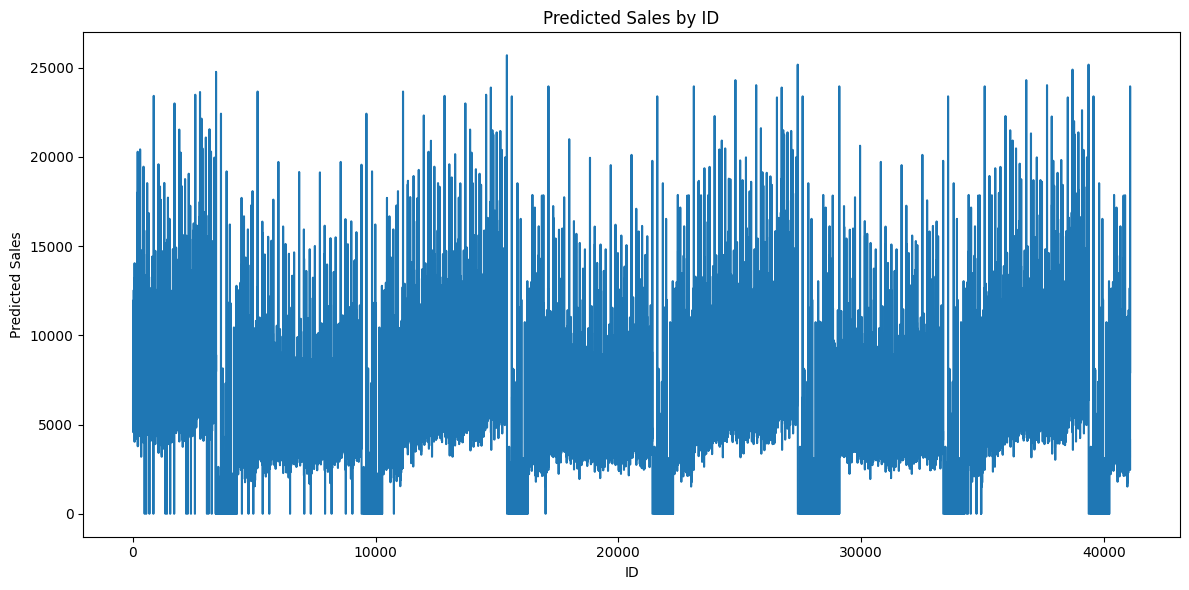

In [40]:
# Visualize the predicted Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=submission, x='Id', y='Sales')
plt.title('Predicted Sales by ID')
plt.xlabel('ID')
plt.ylabel('Predicted Sales')
plt.tight_layout()
plt.show()